# Personal Project: Animetrics Dashboard

In [32]:
!pip install seaborn
!pip install sqlalchemy

<p>In this project, I plan to analyze the popularity of all the anime and manga from MyAnimeList. The data can be found from <a href=https://www.kaggle.com/datasets/nikhil1e9/myanimelist-anime-and-manga>this site</a>.</p> 

In particular I plan to provide the following:
<ul>
    <li> An analysis of the data using Pandas </li>
    <li> Compare the number of ongoing v.s. the number of completed anime in a bar plot.</li>
    <li> A heatmap that indicates the Pearson correlation coefficient between different combinations of variables. </li>
    <li> A pie chart indicating the percentage of the different anime types </li>
    <li> A scatter plot indicating how rank and score are correlated, along with the appropriate regression function. </li>
    <li> A histogram showing the frequency of each score instance </li>
    <li> A bar graph consisting of the number of viewers of the 20 most popular anime (by rank). </li>
    <li> A bar graph showing the highest ranked animes.</li>
    
   

In [33]:
import csv, sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Create database using SQLite and connect to it using Magic SQL.

In [34]:
%load_ext sql

ModuleNotFoundError: No module named 'sql'

Connect to SQLite3 server and create a database called "Animanga". Then create a cursor object to allow you to query data from the database.

In [35]:
connection = sqlite3.connect("Animanga.db")
cursor = connection.cursor()

In [36]:
%sql sqlite:///Animanga.db

UsageError: Line magic function `%sql` not found.


### Store the csv files into Pandas dataframes and then analyze the data.

In <code>pd.read_csv()</code>, the <code>index_col=0</code> term sets the first column of the csv as the index column.

In [37]:
pathAN = r'C:\Users\User\OneDrive\Desktop\Personal_Projects\Animetrics_Project\MAL-anime.csv'
dfAnime = pd.read_csv(pathAN, index_col=0)
dfAnime.head(15)

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44
5,Hana to Mogura,10991,Movie,1,1970 - 1970,595,https://myanimelist.net/anime/13089/Hana_to_Mo...,https://cdn.myanimelist.net/r/100x140/images/a...,5.45
6,Drifters (OVA): Kokuou-sama Goranshin,7084,Special,1,Dec 2017 - Dec 2017,7242,https://myanimelist.net/anime/37046/Drifters_O...,https://cdn.myanimelist.net/r/100x140/images/a...,6.37
7,Himitsukessha Taka no Tsume,8653,TV,11,Apr 2006 - Jun 2006,1216,https://myanimelist.net/anime/4737/Himitsukess...,https://cdn.myanimelist.net/r/100x140/images/a...,6.05
8,Nyanpire The Animation,5629,TV,12,Jul 2011 - Sep 2011,27709,https://myanimelist.net/anime/10197/Nyanpire_T...,https://cdn.myanimelist.net/r/100x140/images/a...,6.65
9,.hack//Intermezzo,6284,Special,1,Mar 2003 - Mar 2003,23083,https://myanimelist.net/anime/1143/hack__Inter...,https://cdn.myanimelist.net/r/100x140/images/a...,6.52


Let's also export the dataframe into SQL as a table called 'AnimeSt'

In [7]:
dfAnime.to_sql('AnimeSt', connection, if_exists='replace', index=False, method='multi')

12774

In [6]:
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12774 entries, 0 to 12773
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      12774 non-null  object 
 1   Rank       12774 non-null  int64  
 2   Type       12774 non-null  object 
 3   Episodes   12774 non-null  object 
 4   Aired      12774 non-null  object 
 5   Members    12774 non-null  int64  
 6   page_url   12774 non-null  object 
 7   image_url  12774 non-null  object 
 8   Score      12774 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 998.0+ KB


Delete the 'page_url' and 'image_url' columns.

In [38]:
dfAnime.drop(['page_url','image_url'], axis=1, inplace=True)
# .drop([list], axis=1, inplace=True): [list] contains a list of column labels or indices we want
# to remove.
# axis=1 means we're removing columns, axis=0 means we're removing rows.

### Plot the number of ongoing v.s. completed anime titles.

Extract the ongoing anime using regular expressions.

In [39]:
ongoing = dfAnime[~dfAnime['Aired'].str.contains(r'[a-zA-Z\s]+[-]+[a-zA-Z0-9\s]')]
ongoing.head(10)

,Title,Rank,Type,Episodes,Aired,Members,Score
142,Honoo no Alpenrose: Ai no Symphony Ongaku-hen,10208,OVA,1,-,514,5.68
782,Imokawa Mukuzo: Genkanban no Maki,11432,Movie,1,Jan 1917 -,1019,5.30
1016,Puzzle & Dragon,10009,TV,?,Apr 2018 -,1437,5.73
1075,Lian Qi Shi Wan Nian,4120,ONA,60,Feb 2023 -,623,6.97
1351,AI no Idenshi,3888,TV,12,Jul 2023 -,21942,7.03
1532,Tom to Jerry (2022),7734,Special,?,Nov 2022 -,925,6.24
1539,Granblue Fantasy,7308,ONA,?,Nov 2013 -,7235,6.32
1589,Knyacki!,8297,TV,?,Apr 1995 -,1020,6.12
1698,Tottoko Hamtarou no Tottoko Taisetsu!! Koutsuu...,7883,OVA,1,-,591,6.20
1708,Hanakappa,9383,TV,?,Mar 2010 -,851,5.89


Extracting the ongoing anime using SQL.

In [11]:
%%sql
SELECT Title, Rank, Type, Episodes, Aired, Members, Score
FROM AnimeSt
WHERE Aired LIKE '%-';

 * sqlite:///Animanga.db
Done.


Title,Rank,Type,Episodes,Aired,Members,Score
Honoo no Alpenrose: Ai no Symphony Ongaku-hen,10208,OVA,1,-,514,5.68
Imokawa Mukuzo: Genkanban no Maki,11432,Movie,1,Jan 1917 -,1019,5.3
Puzzle & Dragon,10009,TV,?,Apr 2018 -,1437,5.73
Lian Qi Shi Wan Nian,4120,ONA,60,Feb 2023 -,623,6.97
AI no Idenshi,3888,TV,12,Jul 2023 -,21942,7.03
Tom to Jerry (2022),7734,Special,?,Nov 2022 -,925,6.24
Granblue Fantasy,7308,ONA,?,Nov 2013 -,7235,6.32
Knyacki!,8297,TV,?,Apr 1995 -,1020,6.12
Tottoko Hamtarou no Tottoko Taisetsu!! Koutsuu Rule,7883,OVA,1,-,591,6.2
Hanakappa,9383,TV,?,Mar 2010 -,851,5.89


Compare the number of ongoing v.s. completed anime.

In [5]:
complete = dfAnime[dfAnime['Aired'].str.contains(r'[a-zA-Z\s]+[-]+[a-zA-Z0-9\s]')]
# .str: Pandas string method. We use this to access string methods within the pandas library.
# .str.contains(REGEXP): returns 1 if a row in the dataframe contains the string REGEXP. Regular 
# expressions can be used here without calling out the 're' library.
#
# dfAnime[dfAnime['Aired'].str.contains(...)] returns the rows that where .str.contains(REGEXP)
# statement returns 1
print(f'Number of ongoing anime: {ongoing.shape[0]}')
print(f'Number of completed anime: {complete.shape[0]}')

Number of ongoing anime: 113
Number of completed anime: 12661


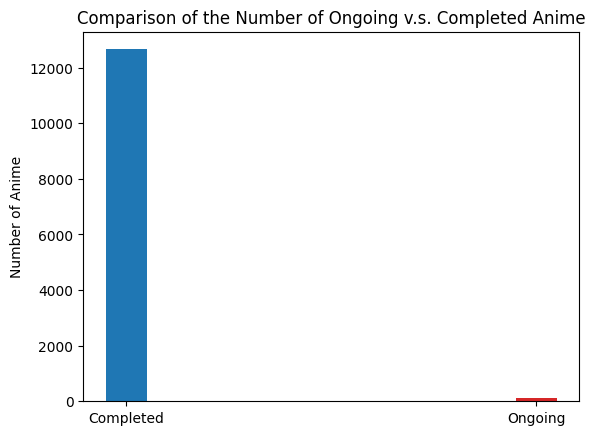

In [6]:
fig, ax = plt.subplots()
bar_labels = ['Completed', 'Ongoing']
bar_colors = ['tab:blue', 'tab:red']

ax.bar(['Completed', 'Ongoing'], [complete.shape[0], ongoing.shape[0]], width=0.1, label=bar_labels, color=bar_colors)

ax.set_ylabel('Number of Anime')
ax.set_title('Comparison of the Number of Ongoing v.s. Completed Anime')

plt.show()

### Generate a heatmap that indicates the Pearson correlation coefficient between different combinations of variables.

In [7]:
dfAnime.corr(method='pearson', numeric_only=True)
# Numeric_only=True: means that only numeric columns will be displayed. numeric_only=False will
# result in an error - you can't determine correlations for columns that contain strings.

,Rank,Members,Score
Rank,1.000000,-0.375716,-0.977151
Members,-0.375716,1.000000,0.397808
Score,-0.977151,0.397808,1.000000


<Axes: >

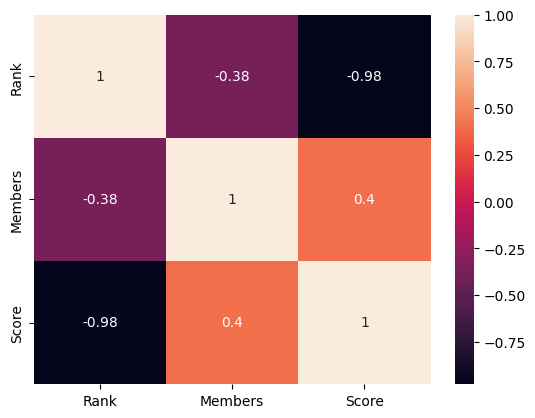

In [12]:
sns.heatmap(dfAnime.corr(method='pearson', numeric_only=True), annot=True)
# Heatmap: provide the correlation data as the first argument.
# annot=True means you'll show the values of the Pearson coefficient.

Recall that the Pearson correlation coefficient measures the linear correlation between 2 variables
<ul>
    <li>Pearson correlation coefficient = 1: strong positive linear correlation</li>
    <li>Pearson correlation coefficient = -1: strong negative linear correlation</li>
    <li>Pearson correlation coefficient = 0: no relationship</li>

### Generate a pie chart indicating the percentage of the different anime types

Group the anime by 'Type' and count the number of each type. Note that this returns the number of each unique type in a Pandas Series format.

In [13]:
count = dfAnime['Type'].value_counts()
count

Type
TV         4510
Movie      2485
Special    2014
ONA        1883
OVA        1881
Unknown       1
Name: count, dtype: int64

Convert a Pandas Series to a DataFrame using the <code>.to_frame()</code> command.

In [14]:
count.to_frame()

,count
Type,
TV,4510
Movie,2485
Special,2014
ONA,1883
OVA,1881
Unknown,1


An alternative method to group data.

In [15]:
count = dfAnime.groupby(['Type'])[['Title']].count()
# groupby(['Type'])[['Title']].count() is the same as grouping the data by the unique values of
# 'Type' and determining the number of occurrences of each type.
#
# groupby has to be called with an aggregate function like count(), mean(), max(), min()
# It's analogous to the GROUP BY function in SQL.

count

,Title
Type,
Movie,2485
ONA,1883
OVA,1881
Special,2014
TV,4510
Unknown,1


As a SQL query:

In [19]:
%%sql
SELECT Type, COUNT(Type) AS Frequency
FROM AnimeSt
GROUP BY Type

 * sqlite:///Animanga.db
Done.


Type,Frequency
Movie,2485
ONA,1883
OVA,1881
Special,2014
TV,4510
Unknown,1


In [16]:
count.index.values

array(['Movie', 'ONA', 'OVA', 'Special', 'TV', 'Unknown'], dtype=object)

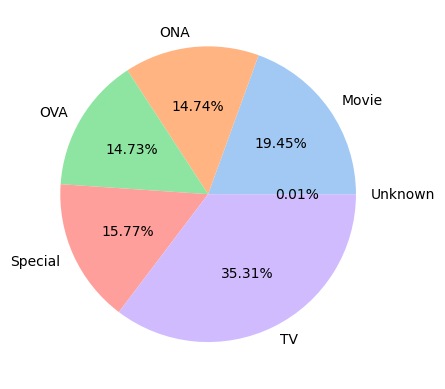

In [17]:
data = count.iloc[:,0].values
labels = list(count.index.values)
# .iloc[:,0].values: takes the first column (not the index column) of the dataframe!
# The .values converts the Pandas Series that results from .iloc into a numpy array.
#
# .index.values: .index returns the index column as a Pandas Series.
# The .values converts the Pandas Series into a numpy array. Note that this is true even if the
# index values are strings.


#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%')
plt.show()

### Determine the correlation between the rank and the members. Fit a regression line between the data.

In [18]:
dict = {'Rank': dfAnime['Rank'].values, 'Score': dfAnime['Score'].values}
dict

{'Rank': array([ 1568,    99, 11445, ..., 12661, 11318,  1750], dtype=int64),
 'Score': array([7.55, 8.55, 5.29, ..., 4.21, 5.34, 7.49])}

Sort the data in order of ascending x-variable, i.e. in order of ascending 'Score'. This is important or else your regression analysis will run into issues.

In [19]:
rl = pd.DataFrame(dict)
rl.sort_values('Rank', ascending=True, inplace=True)

rl.head()

,Rank,Score
3509,1,9.10
10600,2,9.07
7055,3,9.06
1493,4,9.06
7071,5,9.05


Import Sci-Kit Learn.

In [21]:
!pip install sklearn

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

ModuleNotFoundError: No module named 'sklearn'

Fit a polynomial of degree 30 onto the data. Import the polynomial object and transform the data.

In [24]:
pr=PolynomialFeatures(degree=30)
x = rl['Rank'].values.reshape(-1,1)
y = rl['Score'].values.reshape(-1,1)
x_pr=pr.fit_transform(x) # X_pr = [1, a, b, c] = [1, X, X^2, X^3]
x_pr

NameError: name 'PolynomialFeatures' is not defined

Normalize the data using a z-score normalization technique.

In [22]:
scaler = StandardScaler() # Create a scaler object.
x_normpr = scaler.fit_transform(x_pr)

Fit a stochastic gradient descent linear regression object to the data. Vary the lambda parameter to determine the best regularization parameter to fit the data.

In [23]:
sg = SGDRegressor(loss='squared_error', penalty='l2', alpha = 0.01, max_iter=10000)
sg.fit(x_normpr, y)

b_norm = sg.intercept_
w_norm = sg.coef_

y_pred = sg.predict(x_normpr)

C:\Users\nicco\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Plot the training data against the regression line.

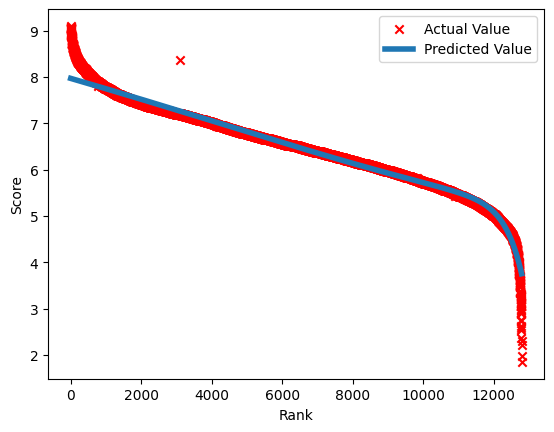

In [24]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.plot(x, y_pred, label="Predicted Value", linewidth=4)
plt.xlabel("Rank")
plt.ylabel("Score")
plt.legend()
plt.show()

Calculate the R-squared value.

In [25]:
sg.score(x_normpr, y)

0.9823612681607082

### Plot a histogram showing the frequency of each score instance

[Text(0.5, 0, 'Score'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram of Scores')]

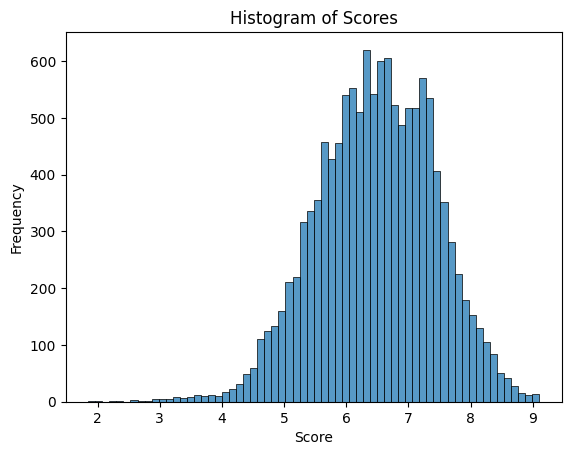

In [25]:
hist = sns.histplot(dfAnime['Score'].values, stat='count')
hist.set(xlabel='Score', ylabel='Frequency', title='Histogram of Scores')

### Plot the 10 anime with the most viewers, the highest rank, and the highest score.

The 10 anime with the most viewers:

In [26]:
topViews = dfAnime.sort_values('Members', ascending=False).head(10)
topViews

,Title,Rank,Type,Episodes,Aired,Members,Score
6079,Shingeki no Kyojin,107,TV,25,Apr 2013 - Sep 2013,3759013,8.54
3043,Death Note,79,TV,37,Oct 2006 - Jun 2007,3727021,8.62
3509,Fullmetal Alchemist: Brotherhood,1,TV,64,Apr 2009 - Jul 2010,3188280,9.10
11213,One Punch Man,126,TV,12,Oct 2015 - Dec 2015,3070593,8.50
854,Sword Art Online,3064,TV,25,Jul 2012 - Dec 2012,2960858,7.20
66,Boku no Hero Academia,743,TV,13,Apr 2016 - Jun 2016,2893115,7.89
5935,Kimetsu no Yaiba,125,TV,26,Apr 2019 - Sep 2019,2827376,8.50
5013,Naruto,603,TV,220,Oct 2002 - Feb 2007,2727570,7.99
7226,Tokyo Ghoul,935,TV,12,Jul 2014 - Sep 2014,2708236,7.79
10748,Hunter x Hunter (2011),10,TV,148,Oct 2011 - Sep 2014,2669186,9.04


In SQL:

In [28]:
%%sql
SELECT Title, Rank, Members
FROM AnimeSt
ORDER BY Members DESC NULLS LAST
LIMIT 10;

 * sqlite:///Animanga.db
Done.


Title,Rank,Members
Shingeki no Kyojin,107,3759013
Death Note,79,3727021
Fullmetal Alchemist: Brotherhood,1,3188280
One Punch Man,126,3070593
Sword Art Online,3064,2960858
Boku no Hero Academia,743,2893115
Kimetsu no Yaiba,125,2827376
Naruto,603,2727570
Tokyo Ghoul,935,2708236
Hunter x Hunter (2011),10,2669186


[Text(0.5, 0, 'Number of Viewers'),
 Text(0, 0.5, 'Title'),
 Text(0.5, 1.0, 'Anime With the Most Viewers')]

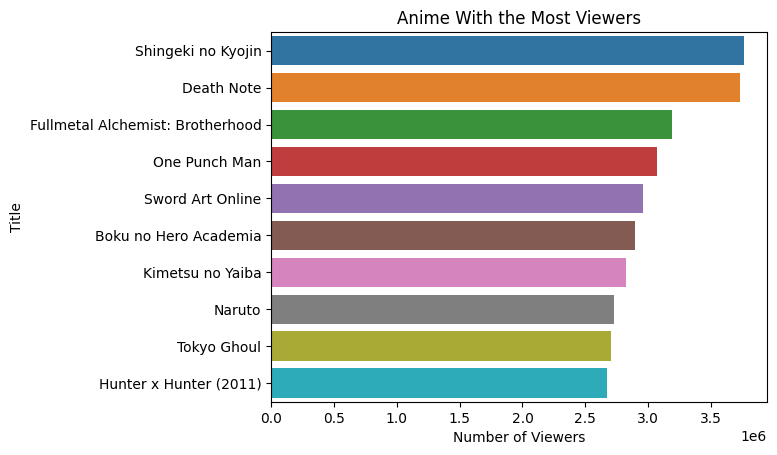

In [27]:
plot = sns.barplot(y='Title',x='Members', data=topViews)
plot.set(xlabel='Number of Viewers', ylabel='Title', title='Anime With the Most Viewers')

I'm suprised One Piece didn't make the list; let's determine the number of One Piece viewers:

In [28]:
dfAnime.loc[dfAnime['Title'] == 'One Piece']

,Title,Rank,Type,Episodes,Aired,Members,Score
7571,One Piece,55,TV,?,Oct 1999 -,2182691,8.69


The top 10 anime with the highest score:

In [29]:
topScore = dfAnime.sort_values('Score', ascending=False).head(10)

In [30]:
topScore[['Title', 'Score']]

,Title,Score
3509,Fullmetal Alchemist: Brotherhood,9.10
10600,Steins;Gate,9.07
1493,Gintama°,9.06
7055,Bleach: Sennen Kessen-hen,9.06
4323,Shingeki no Kyojin Season 3 Part 2,9.05
8322,Shingeki no Kyojin: The Final Season - Kankets...,9.05
7071,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.05
10748,Hunter x Hunter (2011),9.04
1412,Gintama',9.04
10804,Gintama: The Final,9.04


### Determine the 10 longest running anime.

Split the 'Aired' column into "Start_year" and "End_year" columns. Remove the month and replace with the year only.,

In [55]:
dfAnime[['Start_year', 'End_year']] = dfAnime.Aired.str.split('-', expand=True).replace(r'[a-zA-Z\s]','', regex=True)
dfAnime.head()

,Title,Rank,Type,Episodes,Aired,Members,Score,Start_year,End_year
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,7.55,2017,2017
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,8.55,1997,1997
2,Templex,11445,Movie,1,2015 - 2015,538,5.29,2015,2015
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,7.36,2001,2001
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,6.44,2018,2019


In [9]:
dfAnime[dfAnime['Title'] =='Doraemon (1979)']

,Title,Rank,Type,Episodes,Aired,Members,Score,Start_year,End_year
1407,Doraemon (1979),917,TV,1787,Apr 1979 - Mar 2005,59940,7.8,1979,2005


Determine the data type of each column.

In [56]:
dfAnime.dtypes

Title          object
Rank            int64
Type           object
Episodes       object
Aired          object
Members         int64
Score         float64
Start_year     object
End_year       object
dtype: object

Extract only the rows where 'Type' = 'TV' and save that in a new dataframe called 'dfAnimeCopy'.

In [57]:
dfAnimeCopy = dfAnime.loc[dfAnime['Type'] == 'TV']
dfAnimeCopy.head()

,Title,Rank,Type,Episodes,Aired,Members,Score,Start_year,End_year
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,7.55,2017,2017
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,7.36,2001,2001
7,Himitsukessha Taka no Tsume,8653,TV,11,Apr 2006 - Jun 2006,1216,6.05,2006,2006
8,Nyanpire The Animation,5629,TV,12,Jul 2011 - Sep 2011,27709,6.65,2011,2011
10,Banana Fish,133,TV,24,Jul 2018 - Dec 2018,814329,8.48,2018,2018


Locate the TV shows whose end year is empty. This means that these are ongoing.

In [58]:
dfAnimeCopy.loc[(dfAnimeCopy['End_year'] =='')]

,Title,Rank,Type,Episodes,Aired,Members,Score,Start_year,End_year
1016,Puzzle & Dragon,10009,TV,?,Apr 2018 -,1437,5.73,2018,
1351,AI no Idenshi,3888,TV,12,Jul 2023 -,21942,7.03,2023,
1589,Knyacki!,8297,TV,?,Apr 1995 -,1020,6.12,1995,
1708,Hanakappa,9383,TV,?,Mar 2010 -,851,5.89,2010,
1714,Doraemon (2005),1256,TV,?,Apr 2005 -,18608,7.65,2005,
...,...,...,...,...,...,...,...,...,...
12060,Genjitsu no Yohane: Sunshine in the Mirror,1903,TV,13,Jul 2023 -,22780,7.45,2023,
12523,Ayaka,5822,TV,12,Jul 2023 -,21405,6.61,2023,
12569,Kirin the Noop,11830,TV,?,Feb 2014 -,676,5.11,2014,
12726,Sore Ike! Anpanman,6246,TV,?,Oct 1988 -,3574,6.53,1988,


Replace those with empty 'End_year' with '2023'. Note: using <code>.str.replace</code> didn't work here.

Therefore, I had to use <code>DataFrame.replace({'Column':'', 'Column':'2023'}, inplace=True})</code> instead.

In [61]:
dfAnimeCopy = dfAnimeCopy.End_year.replace('', '2023')
# Replaces the rows with empty 'End_year' with '2023'.

AttributeError: 'Series' object has no attribute 'End_year'

Remove rows whose 'Start_year' is empty. These don't belong in the dataframe.

In [60]:
dfAnimeCopy = dfAnimeCopy.loc[dfAnimeCopy['Start_year'] !='']

KeyError: 'Start_year'

Convert the 'End_year' and 'Start_year' data values into integers using <code>.astype(int)</code> and determine the span. Convert the span variable y into a list and save it in a new column called 'Span'.

In [62]:
dfAnimeCopy.loc[dfAnimeCopy['Title']=='One Piece']

KeyError: 'Title'

In [31]:
y = dfAnimeCopy['End_year'].astype(int) - dfAnimeCopy['Start_year'].astype(int)

ValueError: invalid literal for int() with base 10: ''

In [22]:
dfAnimeCopy['Span'] = y.tolist()

NameError: name 'y' is not defined

In [23]:
dfAnimeCopy.head()

,Title,Rank,Type,Episodes,Aired,Members,Score,Start_year,End_year
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,7.55,2017,2017
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,7.36,2001,2001
7,Himitsukessha Taka no Tsume,8653,TV,11,Apr 2006 - Jun 2006,1216,6.05,2006,2006
8,Nyanpire The Animation,5629,TV,12,Jul 2011 - Sep 2011,27709,6.65,2011,2011
10,Banana Fish,133,TV,24,Jul 2018 - Dec 2018,814329,8.48,2018,2018


Let's sort the column 'Span' in ascending order.

In [33]:
dfAnimeCopy = dfAnimeCopy.sort_values('Span', ascending=False).head(10)

In [34]:
dfAnimeCopy

,Title,Rank,Type,Episodes,Aired,Members,Score,Start_year,End_year,Span
8528,Sazae-san,8386,TV,?,Oct 1969 -,7927,6.10,1969,2023,54
12726,Sore Ike! Anpanman,6246,TV,?,Oct 1988 -,3574,6.53,1988,2023,35
8988,Crayon Shin-chan,965,TV,?,Apr 1992 -,80088,7.78,1992,2023,31
11497,Nintama Rantarou,3653,TV,?,Apr 1993 -,7212,7.08,1993,2023,30
6753,Chibi Maruko-chan (1995),2732,TV,?,Jan 1995 -,5295,7.26,1995,2023,28
1589,Knyacki!,8297,TV,?,Apr 1995 -,1020,6.12,1995,2023,28
9158,Detective Conan,379,TV,?,Jan 1996 -,335827,8.17,1996,2023,27
1407,Doraemon (1979),917,TV,1787,Apr 1979 - Mar 2005,59940,7.80,1979,2005,26
4616,Ojarumaru,7327,TV,?,Oct 1998 -,1904,6.32,1998,2023,25
7571,One Piece,55,TV,?,Oct 1999 -,2182691,8.69,1999,2023,24


Let's plot the span of each of the top 10 anime listed above.

[Text(0.5, 0, 'Number of Years'),
 Text(0, 0.5, 'Title'),
 Text(0.5, 1.0, 'Longest Running Anime')]

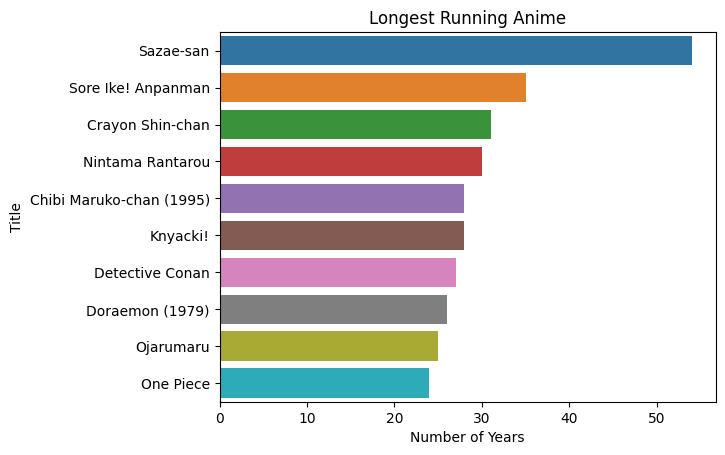

In [35]:
plot = sns.barplot(y='Title',x='Span', data=dfAnimeCopy)
plot.set(xlabel='Number of Years', ylabel='Title', title='Longest Running Anime')

### Determine how the number of anime published has changed over the years.

In [207]:
dfAnimeCopy.to_sql('AnimeSt2', connection, if_exists='replace', index=False, method='multi')

10

In [208]:
decade = range(194,203)
decades = [str(x) for x in decade]
for i, value in enumerate(decades):
    decades[i]=value+'%'

decades

['194%', '195%', '196%', '197%', '198%', '199%', '200%', '201%', '202%']

In [214]:
%%sql
SELECT *
FROM AnimeSt
LIMIT 5;

 * sqlite:///Animanga.db
Done.


Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no_Susume,https://cdn.myanimelist.net/r/100x140/images/anime/3/87463.jpg?s=db709e677b62490fbf95785ed1dac6b7,7.55
Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_Evangelion__The_End_of_Evangelion,https://cdn.myanimelist.net/r/100x140/images/anime/1404/98182.jpg?s=98628f236cf7dbac1e0b6eb6d0615aa5,8.55
Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/anime/1714/104368.jpg?s=fa00bd8ccbfc255b27f0b8d24b034b10,5.29
s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/anime/8/89882.jpg?s=82657db302a858b9747cd5de04e3a939,7.36
Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Majutsu_no_Index-tan_III,https://cdn.myanimelist.net/r/100x140/images/anime/1937/98538.jpg?s=0c59f7c19e24490f3cd26266b42a0619,6.44


In [164]:
for term in decades:
    
    # Obtain the most popular manga for given decade.
    popManga = %sql SELECT COUNT(Title FROM AnimeSt2 WHERE Start_year LIKE :term;
    
    # Convert results of a SQL query into a list of list.
    x = [list(value) for value in popManga]
    #print(x)
    #print(len(DFManga_by_decade.index))
    
    # Append the list from the SQL query into the DFManga_by_decade dataframe.
    DFManga_by_decade.loc[len(DFManga_by_decade.index)]=x[0]

# Display the result.
DFManga_by_decade
    


 * sqlite:///Animanga.db
(sqlite3.OperationalError) no such column: Title
[SQL: SELECT Title FROM AnimeSt2 WHERE Start_year LIKE ?;]
[parameters: ('194%',)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


TypeError: 'NoneType' object is not iterable

Remove the '?' and replace with np.NaN.

In [83]:
dfManga.replace('?', np.NaN, inplace=True)

<br>For manga that are ongoing, we also want to replace the date range under 'Published' to 'Ongoing'.</br>
<code>dfManga['Published'].str.contains('- ')</code> will return True if the manga is finished and False if it's ongoing.

In [84]:
not_ongoing = dfManga['Published'].str.contains('- ')
not_ongoing.head(15)


0      True
1      True
2     False
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14    False
Name: Published, dtype: bool

If <code>dfManga['Published'].str.contains('- ')</code> returns False, then replace it with 'Ongoing' using the following command:

In [85]:
dfManga.loc[dfManga['Published'].str.contains('- ') == False, 'Published'] = 'Ongoing'
dfManga.head(15)
    

,Title,Rank,Type,Volumes,Published,Members,page_url,image_url,Score
0,City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,https://myanimelist.net/manga/792/City_Hunter,https://cdn.myanimelist.net/r/100x140/images/m...,8.16
1,Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,https://myanimelist.net/manga/56505/Keijo,https://cdn.myanimelist.net/r/100x140/images/m...,7.31
2,Rain,1808,Manga,NaN,Ongoing,12021,https://myanimelist.net/manga/17237/Rain,https://cdn.myanimelist.net/r/100x140/images/m...,7.67
3,Hidari no Futari,17377,One-shot,NaN,2011 - 2011,1010,https://myanimelist.net/manga/26610/Hidari_no_...,https://cdn.myanimelist.net/r/100x140/images/m...,5.95
4,Odd Girl Out,953,Manhwa,NaN,Ongoing,4968,https://myanimelist.net/manga/119521/Odd_Girl_Out,https://cdn.myanimelist.net/r/100x140/images/m...,7.90
5,Watashi no Fushidara,17169,Manga,2,Nov 2015 - Dec 2016,3659,https://myanimelist.net/manga/106646/Watashi_n...,https://cdn.myanimelist.net/r/100x140/images/m...,6.07
6,Uchuu Senkan Yamato,12124,Manga,3,Oct 1974 - Dec 1979,1168,https://myanimelist.net/manga/33333/Uchuu_Senk...,https://cdn.myanimelist.net/r/100x140/images/m...,6.74
7,Ruru Chouchou,13402,One-shot,NaN,Dec 2012 - Dec 2012,457,https://myanimelist.net/manga/47807/Ruru_Chouchou,https://cdn.myanimelist.net/r/100x140/images/m...,6.64
8,Confession,4417,Manga,1,Apr 1998 - Sep 1998,6005,https://myanimelist.net/manga/1541/Confession,https://cdn.myanimelist.net/r/100x140/images/m...,7.32
9,Ibara no Namida,12480,Manga,1,Jan 2011 - Jan 2011,580,https://myanimelist.net/manga/33841/Ibara_no_N...,https://cdn.myanimelist.net/r/100x140/images/m...,6.71


In [ ]:
dfManga.to_sql('MangaStats', connection, if_exists='replace', index=False, method='multi')Manga.to_sql('MangaStats', connection, if_exists='replace', index=False, method='multi')

Repeat with the anime csv.

In [90]:
pathAN = r'C:\Users\nicco\OneDrive\Desktop\IBM Data Science Certificate\Personal_Projects\Animetrics_Project\MAL-anime.csv'
dfAnime = pd.read_csv(pathAN, index_col=0)
dfAnime.replace('?', np.NaN, inplace=True)
dfAnime.head(10)

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44
5,Hana to Mogura,10991,Movie,1,1970 - 1970,595,https://myanimelist.net/anime/13089/Hana_to_Mo...,https://cdn.myanimelist.net/r/100x140/images/a...,5.45
6,Drifters (OVA): Kokuou-sama Goranshin,7084,Special,1,Dec 2017 - Dec 2017,7242,https://myanimelist.net/anime/37046/Drifters_O...,https://cdn.myanimelist.net/r/100x140/images/a...,6.37
7,Himitsukessha Taka no Tsume,8653,TV,11,Apr 2006 - Jun 2006,1216,https://myanimelist.net/anime/4737/Himitsukess...,https://cdn.myanimelist.net/r/100x140/images/a...,6.05
8,Nyanpire The Animation,5629,TV,12,Jul 2011 - Sep 2011,27709,https://myanimelist.net/anime/10197/Nyanpire_T...,https://cdn.myanimelist.net/r/100x140/images/a...,6.65
9,.hack//Intermezzo,6284,Special,1,Mar 2003 - Mar 2003,23083,https://myanimelist.net/anime/1143/hack__Inter...,https://cdn.myanimelist.net/r/100x140/images/a...,6.52


In [94]:
dfAnime.loc[dfAnime['Aired'].str.contains('- ') == False, 'Aired'] = 'Ongoing'
dfAnime.head(15)

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
0,Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no...,https://cdn.myanimelist.net/r/100x140/images/a...,7.55
1,Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_...,https://cdn.myanimelist.net/r/100x140/images/a...,8.55
2,Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/a...,5.29
3,s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/a...,7.36
4,Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Maju...,https://cdn.myanimelist.net/r/100x140/images/a...,6.44
5,Hana to Mogura,10991,Movie,1,1970 - 1970,595,https://myanimelist.net/anime/13089/Hana_to_Mo...,https://cdn.myanimelist.net/r/100x140/images/a...,5.45
6,Drifters (OVA): Kokuou-sama Goranshin,7084,Special,1,Dec 2017 - Dec 2017,7242,https://myanimelist.net/anime/37046/Drifters_O...,https://cdn.myanimelist.net/r/100x140/images/a...,6.37
7,Himitsukessha Taka no Tsume,8653,TV,11,Apr 2006 - Jun 2006,1216,https://myanimelist.net/anime/4737/Himitsukess...,https://cdn.myanimelist.net/r/100x140/images/a...,6.05
8,Nyanpire The Animation,5629,TV,12,Jul 2011 - Sep 2011,27709,https://myanimelist.net/anime/10197/Nyanpire_T...,https://cdn.myanimelist.net/r/100x140/images/a...,6.65
9,.hack//Intermezzo,6284,Special,1,Mar 2003 - Mar 2003,23083,https://myanimelist.net/anime/1143/hack__Inter...,https://cdn.myanimelist.net/r/100x140/images/a...,6.52


In [95]:
dfAnime.loc[dfAnime['Aired'].str.contains('Ongoing')]

,Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
142,Honoo no Alpenrose: Ai no Symphony Ongaku-hen,10208,OVA,1,Ongoing,514,https://myanimelist.net/anime/35628/Honoo_no_A...,https://cdn.myanimelist.net/r/100x140/images/a...,5.68
782,Imokawa Mukuzo: Genkanban no Maki,11432,Movie,1,Ongoing,1019,https://myanimelist.net/anime/17387/Imokawa_Mu...,https://cdn.myanimelist.net/r/100x140/images/q...,5.30
1016,Puzzle & Dragon,10009,TV,NaN,Ongoing,1437,https://myanimelist.net/anime/37096/Puzzle___D...,https://cdn.myanimelist.net/r/100x140/images/a...,5.73
1075,Lian Qi Shi Wan Nian,4120,ONA,60,Ongoing,623,https://myanimelist.net/anime/54437/Lian_Qi_Sh...,https://cdn.myanimelist.net/r/100x140/images/a...,6.97
1351,AI no Idenshi,3888,TV,12,Ongoing,21942,https://myanimelist.net/anime/53787/AI_no_Idenshi,https://cdn.myanimelist.net/r/100x140/images/a...,7.03
...,...,...,...,...,...,...,...,...,...
12523,Ayaka,5822,TV,12,Ongoing,21405,https://myanimelist.net/anime/53428/Ayaka,https://cdn.myanimelist.net/r/100x140/images/a...,6.61
12569,Kirin the Noop,11830,TV,NaN,Ongoing,676,https://myanimelist.net/anime/35694/Kirin_the_...,https://cdn.myanimelist.net/r/100x140/images/a...,5.11
12588,Dubu Xiaoyao,5371,ONA,380,Ongoing,2901,https://myanimelist.net/anime/42267/Dubu_Xiaoyao,https://cdn.myanimelist.net/r/100x140/images/a...,6.70
12726,Sore Ike! Anpanman,6246,TV,NaN,Ongoing,3574,https://myanimelist.net/anime/1960/Sore_Ike_An...,https://cdn.myanimelist.net/r/100x140/images/a...,6.53


### 3. Export the data into SQL data tables.

In [11]:
# Dataframe.to_sql(name, connection, schema=None, if_exists='fail', 
#     index=True, index_label=None, #chunksize=None, dtype=None, method=None)

To_sql writes dataframe into sql table. Input parameters of to_sql:

- name: name of SQL table to be created from dataframe

- connection: the connection object (which database to connect to)

- if_exists: if table exists, what should be done?

- index=True: write dataframe index as a column.

- method="multi": pass multiple rows of SQL data in single INSERT clause.

In [96]:
dfManga.to_sql('MangaStats', connection, if_exists='replace', index=False, method='multi')

17811

In [97]:
dfAnime.to_sql('AnimeStats', connection, if_exists='replace', index=False, method='multi')

12774

Check to ensure that the correct database is created and the tables have been properly imported.

In [98]:
%%sql
SELECT name
FROM sqlite_master
WHERE type = "table";

 * sqlite:///Animanga.db
Done.


name
MangaStats
AnimeStats


In [99]:
%%sql
SELECT *
FROM MangaStats
LIMIT 5;

 * sqlite:///Animanga.db
Done.


Title,Rank,Type,Volumes,Published,Members,page_url,image_url,Score
City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,https://myanimelist.net/manga/792/City_Hunter,https://cdn.myanimelist.net/r/100x140/images/manga/5/272237.jpg?s=91027a075fc64be41ed3f44b0186cc64,8.16
Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,https://myanimelist.net/manga/56505/Keijo,https://cdn.myanimelist.net/r/100x140/images/manga/3/168393.jpg?s=630ab39042bfd9b95226a974cb5920b3,7.31
Rain,1808,Manga,None,Ongoing,12021,https://myanimelist.net/manga/17237/Rain,https://cdn.myanimelist.net/r/100x140/images/manga/3/25899.jpg?s=fc5341a8b225edc266780a138e24db97,7.67
Hidari no Futari,17377,One-shot,None,2011 - 2011,1010,https://myanimelist.net/manga/26610/Hidari_no_Futari,https://cdn.myanimelist.net/r/100x140/images/manga/3/42789.jpg?s=491ea73ed1f10bba3610c7b74ef277af,5.95
Odd Girl Out,953,Manhwa,None,Ongoing,4968,https://myanimelist.net/manga/119521/Odd_Girl_Out,https://cdn.myanimelist.net/r/100x140/images/manga/2/222276.jpg?s=bef6998d7e636de5d833d0be680b4118,7.9


In [17]:
%%sql
SELECT *
FROM AnimeStats
LIMIT 5;

 * sqlite:///Animanga.db
Done.


Title,Rank,Type,Episodes,Aired,Members,page_url,image_url,Score
Net-juu no Susume,1568,TV,10,Oct 2017 - Dec 2017,450968,https://myanimelist.net/anime/36038/Net-juu_no_Susume,https://cdn.myanimelist.net/r/100x140/images/anime/3/87463.jpg?s=db709e677b62490fbf95785ed1dac6b7,7.55
Neon Genesis Evangelion: The End of Evangelion,99,Movie,1,Jul 1997 - Jul 1997,883576,https://myanimelist.net/anime/32/Neon_Genesis_Evangelion__The_End_of_Evangelion,https://cdn.myanimelist.net/r/100x140/images/anime/1404/98182.jpg?s=98628f236cf7dbac1e0b6eb6d0615aa5,8.55
Templex,11445,Movie,1,2015 - 2015,538,https://myanimelist.net/anime/40721/Templex,https://cdn.myanimelist.net/r/100x140/images/anime/1714/104368.jpg?s=fa00bd8ccbfc255b27f0b8d24b034b10,5.29
s.CRY.ed,2248,TV,26,Jul 2001 - Dec 2001,81283,https://myanimelist.net/anime/168/sCRYed,https://cdn.myanimelist.net/r/100x140/images/anime/8/89882.jpg?s=82657db302a858b9747cd5de04e3a939,7.36
Toaru Majutsu no Index-tan III,6679,Special,2,Dec 2018 - Apr 2019,11370,https://myanimelist.net/anime/39094/Toaru_Majutsu_no_Index-tan_III,https://cdn.myanimelist.net/r/100x140/images/anime/1937/98538.jpg?s=0c59f7c19e24490f3cd26266b42a0619,6.44


### 4. Determine the 10 most popular manga and anime and plot the number of readers/viewers in a bar graph.

Determine the manga with the top 20 rankings. Determine the number of members - that is, the number of people who have read it.
Note that having more members doesn't necessarily mean it's the most popular - the aggregate score of the manga comes into play too.

In [100]:
%%sql
SELECT Title, Rank, Members
FROM MangaStats
ORDER BY Rank ASC NULLS LAST
LIMIT 20;

 * sqlite:///Animanga.db
Done.


Title,Rank,Members
Berserk,1,637448
JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,246104
Vagabond,3,345175
One Piece,4,573384
Monster,5,226020
Slam Dunk,6,156001
Vinland Saga,7,279101
Fullmetal Alchemist,8,282763
Grand Blue,9,166433
Oyasumi Punpun,10,409969


<p>It's not surprising that Berserk is ranked at number 1. That being said, I've never read JoJo's Bizzare Adventure: Steel Ball Run. Nor have I heard of Vagabond or Oyasumi Punpun.</p>
<p>Let's store this data into a pandas dataframe called 'MangaDF'.</p>

In [101]:
Manga_stats = %sql SELECT Title, Rank, Members FROM MangaStats ORDER BY Rank ASC NULLS LAST LIMIT 20;
MangaDF = Manga_stats.DataFrame()
type(MangaDF)

 * sqlite:///Animanga.db
Done.


pandas.core.frame.DataFrame

Determine the anime with the top 20 rankings. Determine the number of members - that is, the number of people who have watched it.
Note that having more members doesn't necessarily mean it's the most popular - the aggregate score of the anime comes into play too.

In [102]:
%%sql
SELECT Title, Rank, Members
FROM AnimeStats
ORDER BY Rank ASC NULLS LAST
LIMIT 20;

 * sqlite:///Animanga.db
Done.


Title,Rank,Members
Fullmetal Alchemist: Brotherhood,1,3188280
Steins;Gate,2,2449954
Bleach: Sennen Kessen-hen,3,453048
Gintama°,4,598624
Kaguya-sama wa Kokurasetai: Ultra Romantic,5,830316
Shingeki no Kyojin Season 3 Part 2,6,2115515
Shingeki no Kyojin: The Final Season - Kanketsu-hen,7,446872
Gintama',8,528133
Gintama: The Final,9,134175
Hunter x Hunter (2011),10,2669186


In [103]:
Anime_stats = %sql SELECT Title, Rank, Members FROM AnimeStats ORDER BY Rank ASC NULLS LAST LIMIT 20;
AnimeDF = Anime_stats.DataFrame()
type(AnimeDF)

 * sqlite:///Animanga.db
Done.


pandas.core.frame.DataFrame

###### Plot the number of viewers of each manga.

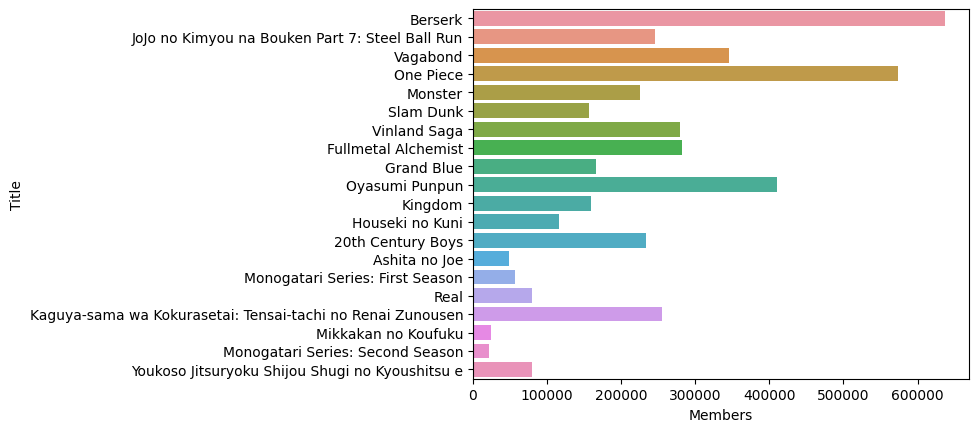

In [37]:
plot = sns.barplot(y='Title',x='Members', data=MangaDF)

##### Plot the number of viewers of each anime.

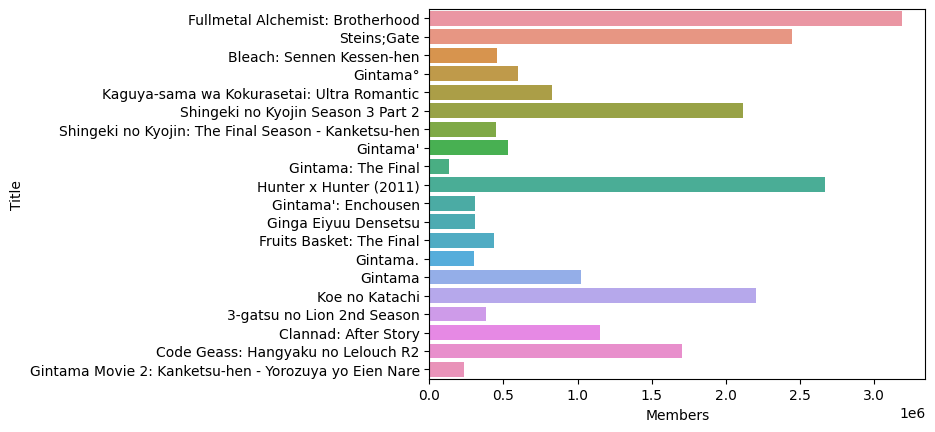

In [104]:
plot = sns.barplot(y='Title',x='Members', data=AnimeDF)

### 5. Determine the most popular manga and anime by decade.

Display the top 5 mangas from the 1940s.

In [106]:
%%sql
SELECT Title, Rank, Members, Published
FROM MangaStats
WHERE Published LIKE '%194%'
ORDER BY Rank ASC NULLS LAST
LIMIT 5;

 * sqlite:///Animanga.db
Done.


Title,Rank,Members,Published
Chiteikoku no Kaijin,9953,585,Feb 1948 - Feb 1948
Sazae-san,11873,655,Apr 1946 - Feb 1974
Shin Takarajima,12517,1655,Apr 1947 - Apr 1947
Metropolis,12967,3028,Sep 1949 - Sep 1949
Lost World,15300,1218,Dec 1948 - Dec 1948


Display the top 5 mangas that are ongoing.

In [105]:
%%sql
SELECT Title, Rank, Members, Published
FROM MangaStats
WHERE Published LIKE '%Ongoing%'
ORDER BY Rank ASC NULLS LAST
LIMIT 5;

 * sqlite:///Animanga.db
Done.


Title,Rank,Members,Published
Berserk,1,637448,Ongoing
One Piece,4,573384,Ongoing
Vinland Saga,7,279101,Ongoing
Grand Blue,9,166433,Ongoing
Kingdom,11,159673,Ongoing


Let's determine the manga with the highest rank in each decade. First, create a list called <code>decades</code>.

In [172]:
decade = range(194,203)
decades = [str(x) for x in decade]
for i, value in enumerate(decades):
    decades[i]='%'+value+'%'

decades.append('Ongoing')
decades
    

['%194%',
 '%195%',
 '%196%',
 '%197%',
 '%198%',
 '%199%',
 '%200%',
 '%201%',
 '%202%',
 'Ongoing']

Then create an empty dataframe with columns called 'Title', 'Rank', 'Members', 'Published'.

In [173]:
DFManga_by_decade = pd.DataFrame(columns = ['Title', 'Rank', 'Members', 'Published'])
DFManga_by_decade

    

,Title,Rank,Members,Published


For each decade in decades, we're going to use SQL queries to determine the manga with the highest rank, store the SQL result in a dataframe, and append the dataframe to <code>DFManga_by_decade</code>

In [174]:
for term in decades:
    
    # Obtain the most popular manga for given decade.
    popManga = %sql SELECT Title, Rank, Members, Published FROM MangaStats WHERE Published LIKE :term ORDER BY Rank ASC NULLS LAST LIMIT 1;
    
    # Convert results of a SQL query into a list of list.
    x = [list(value) for value in popManga]
    #print(x)
    #print(len(DFManga_by_decade.index))
    
    # Append the list from the SQL query into the DFManga_by_decade dataframe.
    DFManga_by_decade.loc[len(DFManga_by_decade.index)]=x[0]

# Display the result.
DFManga_by_decade
    



 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.


,Title,Rank,Members,Published
0,Chiteikoku no Kaijin,9953,585,Feb 1948 - Feb 1948
1,38-do Senjou no Kaibutsu,2599,276,1952 - 1953
2,Ashita no Joe,14,48270,Jan 1968 - May 1973
3,Ashita no Joe,14,48270,Jan 1968 - May 1973
4,Kaze no Tani no Nausicaä,31,54824,Oct 1982 - Feb 1994
5,Vagabond,3,345175,Sep 1998 - May 2015
6,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,246104,Jan 2004 - Apr 2011
7,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,246104,Jan 2004 - Apr 2011
8,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,17,254790,May 2015 - Nov 2022
9,Berserk,1,637448,Ongoing


In [175]:
DFAnime_by_decade = pd.DataFrame(columns = ['Title', 'Rank', 'Members', 'Aired'])

for term in decades:
    
    # Obtain the most popular manga for given decade.
    popAn = %sql SELECT Title, Rank, Members, Aired FROM AnimeStats WHERE Aired LIKE :term ORDER BY Rank ASC NULLS LAST LIMIT 1;
    #print(popAn)
    
    # Convert results of a SQL query into a list of list.
    y = [list(value) for value in popAn]
    #print(y)
    #print(len(DFAnime_by_decade.index))
    
    # Append the list from the SQL query into the DFAnime_by_decade dataframe.
    DFAnime_by_decade.loc[len(DFAnime_by_decade.index)]=y[0]

# Display the result.
DFAnime_by_decade
    


 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.
 * sqlite:///Animanga.db
Done.


,Title,Rank,Members,Aired
0,Kumo to Tulip,10301,2276,Apr 1943 - Apr 1943
1,Kuroi Kikori to Shiroi Kikori,8227,925,Jul 1956 - Jul 1956
2,Sasuke,2531,1927,Sep 1968 - Mar 1969
3,Versailles no Bara,224,92801,Oct 1979 - Sep 1980
4,Ginga Eiyuu Densetsu,12,306464,Jan 1988 - Mar 1997
5,Ginga Eiyuu Densetsu,12,306464,Jan 1988 - Mar 1997
6,Fullmetal Alchemist: Brotherhood,1,3188280,Apr 2009 - Jul 2010
7,Fullmetal Alchemist: Brotherhood,1,3188280,Apr 2009 - Jul 2010
8,Bleach: Sennen Kessen-hen,3,453048,Oct 2022 - Dec 2022
9,One Piece,55,2182691,Ongoing


##### Summarize the results.

In [177]:
columns = ['Decade', 'Manga', 'Number of Manga Readers', 'Anime', 'Number of Anime Viewers']
Summary = pd.DataFrame(columns = columns)

Decade = ['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', 'Ongoing']
Manga = DFManga_by_decade['Title'].values.tolist()
NumReaders = DFManga_by_decade['Members'].values.tolist()
Anime = DFAnime_by_decade['Title'].values.tolist()
NumViewers = DFAnime_by_decade['Members'].values.tolist()

Summary['Decade']=Decade
Summary['Manga']=Manga
Summary['Number of Manga Readers']=NumReaders
Summary['Anime']=Anime
Summary['Number of Anime Viewers']=NumViewers

Summary


,Decade,Manga,Number of Manga Readers,Anime,Number of Anime Viewers
0,1940s,Chiteikoku no Kaijin,585,Kumo to Tulip,2276
1,1950s,38-do Senjou no Kaibutsu,276,Kuroi Kikori to Shiroi Kikori,925
2,1960s,Ashita no Joe,48270,Sasuke,1927
3,1970s,Ashita no Joe,48270,Versailles no Bara,92801
4,1980s,Kaze no Tani no Nausicaä,54824,Ginga Eiyuu Densetsu,306464
5,1990s,Vagabond,345175,Ginga Eiyuu Densetsu,306464
6,2000s,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,246104,Fullmetal Alchemist: Brotherhood,3188280
7,2010s,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,246104,Fullmetal Alchemist: Brotherhood,3188280
8,2020s,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,254790,Bleach: Sennen Kessen-hen,453048
9,Ongoing,Berserk,637448,One Piece,2182691


In [178]:
connection.close()